support vector machine

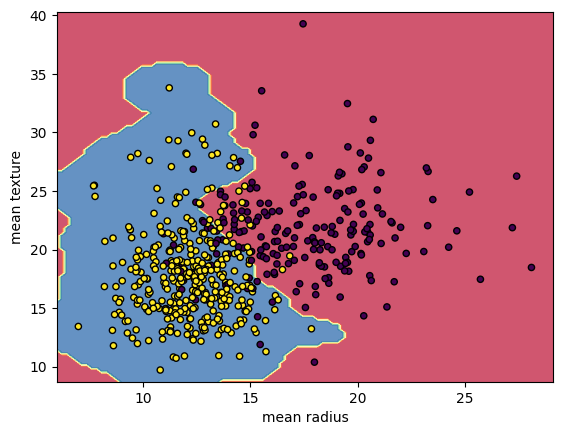

In [8]:
# Load the important packages
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

# Load the datasets
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X, y)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
		svm,
		X,
		response_method="predict",
		cmap=plt.cm.Spectral,
		alpha=0.8,
		xlabel=cancer.feature_names[0],
		ylabel=cancer.feature_names[1],
	)

# Scatter plot
plt.scatter(X[:, 0], X[:, 1],
			c=y,
			s=20, edgecolors="k")
plt.show()


Build k-Means algorithm to cluster a set of data stored in a .CSV file.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

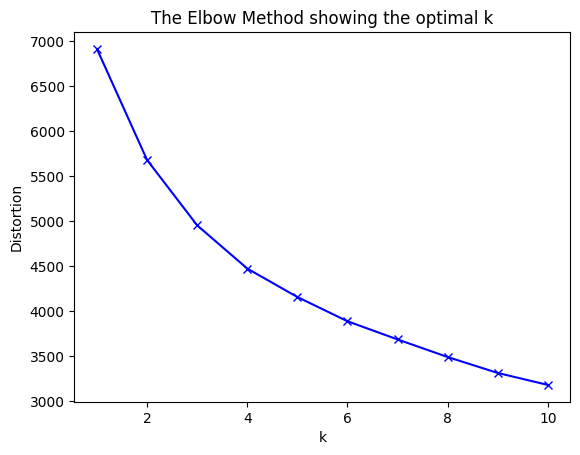

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


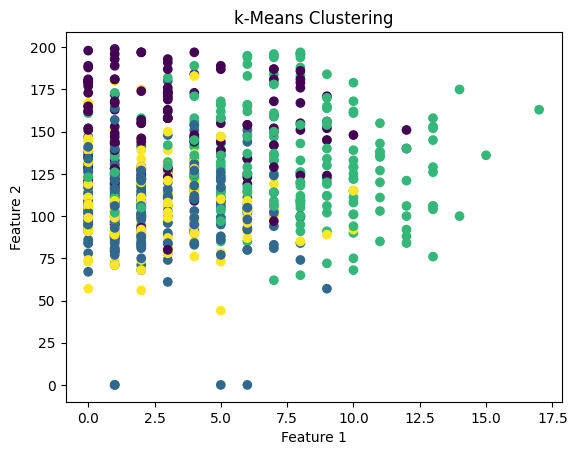

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset from CSV file
def load_dataset(file_path):
    data = pd.read_csv(file_path)
    return data

# Enter the path of the CSV dataset file
file_path = "/content/diabetes.csv"  # Replace "path_to_your_dataset.csv" with your dataset file path

# Load the dataset
data = load_dataset(file_path)

# Preprocessing the data
X = data.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
def find_optimal_k(X):
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(X)
        distortions.append(kmeanModel.inertia_)
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

find_optimal_k(X_scaled)

# Choose the optimal number of clusters based on the Elbow Method
optimal_k = 4

# Apply k-Means clustering
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('k-Means Clustering')
plt.show()


mplement Dimensionality reduction using Principal Component Analysis (PCA) method

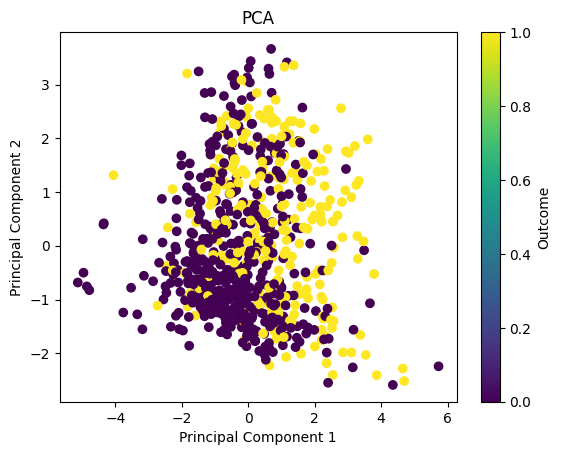

Explained Variance Ratio: [0.26179749 0.21640127]


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset from CSV file
def load_dataset(file_path):
    data = pd.read_csv(file_path)
    return data

# Enter the path of the CSV dataset file
file_path = "/content/diabetes.csv"  # Replace "path_to_your_diabetes_dataset.csv" with the actual path to your dataset file

# Load the dataset
data = load_dataset(file_path)

# Preprocessing the data
X = data.drop(columns=["Outcome"], errors='ignore')  # Drop the 'Outcome' column if it exists
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the data after PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data["Outcome"], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.colorbar(label='Outcome')
plt.show()

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)
